# Spesifikasi

- V<sub>in</sub> = 48V
- V<sub>out</sub> = 12V
- P<sub>o</sub> = 100W
- &#916;V<sub>o</sub> &#8804; 1%
- &#916;I<sub>L</sub> &#8804; 10%
- f<sub>sw</sub> = 20e3
- Mosfet: IRFB4310PbF, Infineon

# Plecs

In [6]:
import xmlrpc.client as xml
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
model = 'buck_1'
file_type = '.plecs'
V_in = 48
V_out = 12

In [3]:
plecs = xml.Server("http://localhost:1080/RPC2").plecs

In [4]:
plecs.load(r"E:\OneDrive - UGM 365\Mata Kuliah\Skripsi\Plecs\Python\buck\buck_1.plecs")


0

# Parameter

L<sub>min</sub> &lt; 144&mu;H &lt; 509&mu;H &lt; 1003&mu;H &lt; L<sub>max</sub>



L<sub>min</sub> 30&mu;H; L<sub>max</sub>2000&mu;H

C<sub>min</sub> 20&mu;F; C<sub>max</sub>1000&mu;F

f<sub>min</sub> 20kHz; f<sub>max</sub>200kHz

diambil 20 x 20 x 20

di mana f itu continous dan L, C diskret

<strong>Parameter yang berubah</strong>:
- f
- L
- C
- R<sub>L</sub> = 
- ESL
- ESR = 

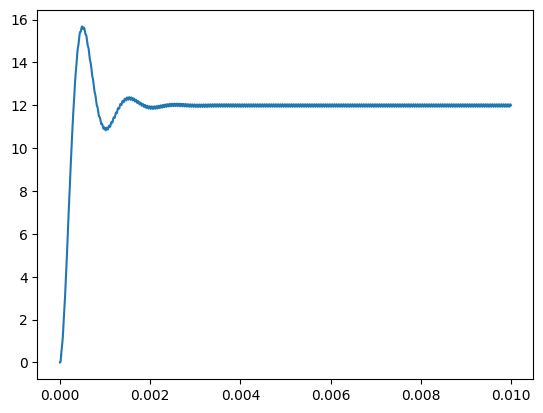

In [16]:
L = 540e-6
C = 43.38e-6
fsw = 20e3

plecs.set(model+'/L1','L', str(L))
plecs.set(model+'/C', 'C', str(C))
plecs.set(model+'/Symmetrical PWM1', 'fc', str(fsw))
times = plecs.simulate(model) ['Time']
current = plecs.simulate(model) ['Values'][0]
voltage = plecs.simulate(model) ['Values'][1]

plt.plot(times,voltage)

In [1]:
import itertools
import random
import numpy as np

# Given values
L_range = (30e-6, 2000e-6)  # Range for L
C_range = (30e-6, 200e-6)   # Range for C
fsw_range = (20e3, 200e3)    # Range for fsw
num_values = 20              # Number of values for each parameter

# Borders for R_L
border_values = [
    (144e-6, 0.079576),
    (509e-6, 0.179228),
    (1003e-6, 0.253239),
    (2519e-6, 0.443394)
]

# Constants for ESL calculation
K_esl = 4.389e-11  # Adjust as needed
tan_delta = 0.14

# Create arrays of discrete L, C, and fsw values within the specified ranges
L_values = np.linspace(L_range[0], L_range[1], num=num_values)
C_values = np.linspace(C_range[0], C_range[1], num=num_values)
fsw_values = np.linspace(fsw_range[0], fsw_range[1], num=num_values)

# Generate all possible combinations
all_combinations = list(itertools.product(L_values, C_values, fsw_values))

# Display num_combinations combinations
num = 0
for combination in all_combinations:
    L, C, fsw = combination

    # Rules for picking R_L based on L
    R_L = next((rl for border, rl in border_values if L <= border), 0.0)

    # Calculate ESR and ESL based on the updated C
    ESR = tan_delta / (2 * np.pi * fsw * C)
    ESL = K_esl / C

    num += 1
    print(f'Combination {num}: L={L:.6f}, C={C:.6f}, fsw={fsw:.2f}, R_L={R_L:.6f}, ESR={ESR:.6f}, ESL={ESL:.6e}')


Combination 1: L=0.000030, C=0.000030, fsw=20000.00, R_L=0.079576, ESR=0.037136, ESL=1.463000e-06
Combination 2: L=0.000030, C=0.000030, fsw=29473.68, R_L=0.079576, ESR=0.025200, ESL=1.463000e-06
Combination 3: L=0.000030, C=0.000030, fsw=38947.37, R_L=0.079576, ESR=0.019070, ESL=1.463000e-06
Combination 4: L=0.000030, C=0.000030, fsw=48421.05, R_L=0.079576, ESR=0.015339, ESL=1.463000e-06
Combination 5: L=0.000030, C=0.000030, fsw=57894.74, R_L=0.079576, ESR=0.012829, ESL=1.463000e-06
Combination 6: L=0.000030, C=0.000030, fsw=67368.42, R_L=0.079576, ESR=0.011025, ESL=1.463000e-06
Combination 7: L=0.000030, C=0.000030, fsw=76842.11, R_L=0.079576, ESR=0.009666, ESL=1.463000e-06
Combination 8: L=0.000030, C=0.000030, fsw=86315.79, R_L=0.079576, ESR=0.008605, ESL=1.463000e-06
Combination 9: L=0.000030, C=0.000030, fsw=95789.47, R_L=0.079576, ESR=0.007754, ESL=1.463000e-06
Combination 10: L=0.000030, C=0.000030, fsw=105263.16, R_L=0.079576, ESR=0.007056, ESL=1.463000e-06
Combination 11: L=

# With combination

In [3]:
import itertools
import random
import numpy as np

# Given values
L_range = (30e-6, 2000e-6)  # Range for L
C_range = (30e-6, 200e-6)   # Range for C
fsw_range = (20e3, 200e3)    # Range for fsw
num_values = 20              # Number of values for each parameter

# Borders for R_L
border_values = [
    (144e-6, 0.079576),
    (509e-6, 0.179228),
    (1003e-6, 0.253239),
    (2519e-6, 0.443394)
]

# Constants for ESL calculation
K_esl = 4.389e-11  # Adjust as needed
tan_delta = 0.14

# Create arrays of discrete L, C, and fsw values within the specified ranges
L_values = np.linspace(L_range[0], L_range[1], num=num_values)
C_values = np.linspace(C_range[0], C_range[1], num=num_values)
fsw_values = np.linspace(fsw_range[0], fsw_range[1], num=num_values)

# Display the first 20 chosen values
print("First 20 chosen values:")
for _ in range(num_values):
    L = random.choice(L_values)
    C = random.choice(C_values)
    fsw = random.choice(fsw_values)
    print(f'L={L:.6f}, C={C:.6f}, fsw={fsw:.2f}')

# Generate all possible combinations
all_combinations = list(itertools.product(L_values, C_values, fsw_values))

# Display num_combinations combinations
num = 0
for combination in all_combinations:
    L, C, fsw = combination

    # Rules for picking R_L based on L
    R_L = next((rl for border, rl in border_values if L <= border), 0.0)

    # Calculate ESR and ESL based on the updated C
    ESR = tan_delta / (2 * np.pi * fsw * C)
    ESL = K_esl / C

    num += 1
    print(f'Combination {num}: L={L:.6f}, C={C:.6f}, fsw={fsw:.2f}, R_L={R_L:.6f}, ESR={ESR:.6f}, ESL={ESL:.6e}')


First 20 chosen values:
L=0.001482, C=0.000119, fsw=171578.95
L=0.000652, C=0.000057, fsw=86315.79
L=0.001793, C=0.000191, fsw=143157.89
L=0.000963, C=0.000137, fsw=67368.42
L=0.002000, C=0.000200, fsw=181052.63
L=0.001585, C=0.000111, fsw=20000.00
L=0.000756, C=0.000128, fsw=190526.32
L=0.000341, C=0.000155, fsw=105263.16
L=0.001067, C=0.000093, fsw=20000.00
L=0.000445, C=0.000030, fsw=76842.11
L=0.001482, C=0.000057, fsw=48421.05
L=0.001378, C=0.000164, fsw=124210.53
L=0.000756, C=0.000093, fsw=114736.84
L=0.001896, C=0.000093, fsw=171578.95
L=0.001896, C=0.000057, fsw=181052.63
L=0.001274, C=0.000057, fsw=95789.47
L=0.000548, C=0.000119, fsw=67368.42
L=0.001274, C=0.000102, fsw=29473.68
L=0.000445, C=0.000102, fsw=152631.58
L=0.000756, C=0.000146, fsw=152631.58
Combination 1: L=0.000030, C=0.000030, fsw=20000.00, R_L=0.079576, ESR=0.037136, ESL=1.463000e-06
Combination 2: L=0.000030, C=0.000030, fsw=29473.68, R_L=0.079576, ESR=0.025200, ESL=1.463000e-06
Combination 3: L=0.000030, C=

## Good but without output

Chosen L values: [3.000e-05 1.015e-03 2.000e-03]
Chosen C values: [3.00e-05 1.15e-04 2.00e-04]
Chosen fsw values: [ 20000. 110000. 200000.]

Chosen values and simulation results:

Simulation 1 for L=0.000030, C=0.000030, fsw=20000.00, RL=0.443394, ESR=0.000557, ESL=2.194500e-07



Simulation 2 for L=0.000030, C=0.000030, fsw=110000.00, RL=0.079576, ESR=0.037136, ESL=1.463000e-06

Simulation 3 for L=0.000030, C=0.000030, fsw=200000.00, RL=0.079576, ESR=0.006752, ESL=1.463000e-06

Simulation 4 for L=0.000030, C=0.000115, fsw=20000.00, RL=0.079576, ESR=0.003714, ESL=1.463000e-06

Simulation 5 for L=0.000030, C=0.000115, fsw=110000.00, RL=0.079576, ESR=0.009688, ESL=3.816522e-07

Simulation 6 for L=0.000030, C=0.000115, fsw=200000.00, RL=0.079576, ESR=0.001761, ESL=3.816522e-07

Simulation 7 for L=0.000030, C=0.000200, fsw=20000.00, RL=0.079576, ESR=0.000969, ESL=3.816522e-07

Simulation 8 for L=0.000030, C=0.000200, fsw=110000.00, RL=0.079576, ESR=0.005570, ESL=2.194500e-07

Simulation 9 for L=0.000030, C=0.000200, fsw=200000.00, RL=0.079576, ESR=0.001013, ESL=2.194500e-07

Simulation 10 for L=0.001015, C=0.000030, fsw=20000.00, RL=0.079576, ESR=0.000557, ESL=2.194500e-07

Simulation 11 for L=0.001015, C=0.000030, fsw=110000.00, RL=0.443394, ESR=0.037136, ESL=1.46

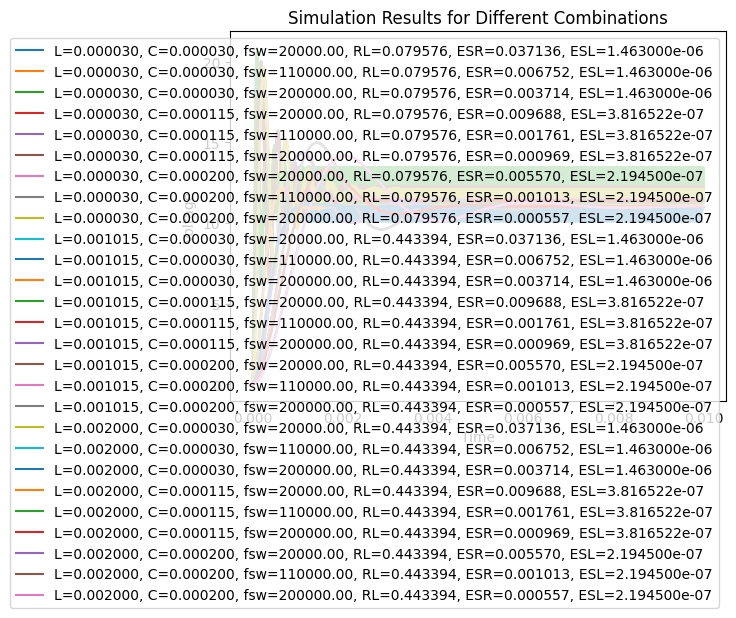

In [10]:
import itertools
import random
import numpy as np
import matplotlib.pyplot as plt

# Given values
L_range = (30e-6, 2000e-6)  # Range for L
C_range = (30e-6, 200e-6)   # Range for C
fsw_range = (20e3, 200e3)    # Range for fsw
num_values = 3            # Number of values for each parameter

# Borders for R_L
border_values = [
    (144e-6, 0.079576),
    (509e-6, 0.179228),
    (1003e-6, 0.253239),
    (2519e-6, 0.443394)
]

# Constants for ESL calculation
K_esl = 4.389e-11  # Adjust as needed
tan_delta = 0.14

# Create arrays of discrete L, C, and fsw values within the specified ranges
L_values = np.linspace(L_range[0], L_range[1], num=num_values)
C_values = np.linspace(C_range[0], C_range[1], num=num_values)
fsw_values = np.linspace(fsw_range[0], fsw_range[1], num=num_values)

# Print the chosen values
print("Chosen L values:", L_values)
print("Chosen C values:", C_values)
print("Chosen fsw values:", fsw_values)

# Generate all combinations of L, C, and fsw
combinations = list(itertools.product(L_values, C_values, fsw_values))

# Display the chosen values and simulate
print("\nChosen values and simulation results:")
for simulation_num, (L, C, fsw) in enumerate(combinations, start=1):
    print(f'\nSimulation {simulation_num} for L={L:.6f}, C={C:.6f}, fsw={fsw:.2f}, RL={R_L:.6f}, ESR={ESR:.6f}, ESL={ESL:.6e}')

    # Rules for picking R_L based on L
    R_L = next((rl for border, rl in border_values if L <= border), 0.0)

    # Calculate ESR and ESL based on the updated C
    ESR = tan_delta / (2 * np.pi * fsw * C)
    ESL = K_esl / C

    # Set Plecs parameters and simulate
    plecs.set(model+'/L1', 'L', str(L))
    plecs.set(model+'/C', 'C', str(C))
    plecs.set(model+'/Symmetrical PWM1', 'fc', str(fsw))
    plecs.set(model+'/RL', 'R', str(R_L))
    plecs.set(model+'/ESR', 'R', str(ESR))
    plecs.set(model+'/ESL', 'L', str(ESL))

    times = plecs.simulate(model)['Time']
    voltage = plecs.simulate(model)['Values'][1]

    # Plot the simulation result
    plt.plot(times, voltage, label=f'L={L:.6f}, C={C:.6f}, fsw={fsw:.2f}, RL={R_L:.6f}, ESR={ESR:.6f}, ESL={ESL:.6e}')

# Show the plot
plt.legend()
plt.xlabel('Time')
plt.ylabel('Voltage')
plt.title('Simulation Results for Different Combinations')
plt.show()


## Try add output (losses into CSV)

In [ ]:
L_range = (30e-6, 2000e-6)  # Range for L
C_range = (30e-6, 200e-6)   # Range for C
fsw_range = (20e3, 200e3)    # Range for fsw
num_values = 3            # Number of values for each parameter

# Borders for R_L
border_values = [
    (144e-6, 0.079576),
    (509e-6, 0.179228),
    (1003e-6, 0.253239),
    (2519e-6, 0.443394)
]

# Constants for ESL calculation
K_esl = 4.389e-11  # Adjust as needed
tan_delta = 0.14

# Create arrays of discrete L, C, and fsw values within the specified ranges
L_values = np.linspace(L_range[0], L_range[1], num=num_values)
C_values = np.linspace(C_range[0], C_range[1], num=num_values)
fsw_values = np.linspace(fsw_range[0], fsw_range[1], num=num_values)

# Print the chosen values
print("Chosen L values:", L_values)
print("Chosen C values:", C_values)
print("Chosen fsw values:", fsw_values)

# Generate all combinations of L, C, and fsw
combinations = list(itertools.product(L_values, C_values, fsw_values))

# Display the chosen values and simulate
print("\nChosen values and simulation results:")

### Average Current and &Delta;I<sub>L</sub>%

In [7]:
# Convert 'times' to a NumPy array
times = np.array(times)

# Find the indices corresponding to the time range
start_time = 0.004
end_time = 0.005

start_index = np.argmax(times >= start_time)
end_index = np.argmax(times >= end_time)

# Extract the current values in the specified time range
current_range = current[start_index:end_index]

# Calculate the average current value
average_current = np.mean(current_range)

# Calculate the difference between the highest and lowest current values
delta_current = np.max(current_range) - np.min(current_range)

print(f"Average Current between {start_time} and {end_time} seconds: {average_current} A")
print(f"\nDifference between highest and lowest current values between {start_time} and {end_time} seconds: {delta_current} A")

NameError: name 'times' is not defined

### &Delta;V<sub>O</sub>%


In [ ]:
# Extract the current values in the specified time range
voltage_range = voltage[start_index:end_index]

# Calculate the difference between the highest and lowest current values
delta_voltage = np.max(voltage_range) - np.min(voltage_range)

print(f"Difference between highest and lowest voltage values between {start_time} and {end_time} seconds: {delta_voltage} V")

### Switching Losses

#### Conduction Loss

- R<sub>DS(on)</sub> = R<sub>ON-H</sub> = R<sub>ON-L</sub> = 5.6k&Omega; 

##### High Side

P<sub>ON-H</sub> = I<sub>OUT</sub> / 2 &times; R<sub>ON-H</sub> &times; V<sub>OUT</sub> / V<sub>IN</sub> [W]


In [ ]:
R_on = 5.6

P_ON_H = average_current / 2 * R_on * V_out / V_in

##### Low Side

P<sub>ON-L</sub> = I<sub>OUT</sub> / 2 &times; R<sub>ON-L</sub> &times; (1 - V<sub>OUT</sub> / V<sub>IN</sub>) [W]


In [ ]:
P_ON_L = average_current / 2 * R_on * V_out / V_in

#### Switching Losses

- t<sub>rise</sub> = 110 ns  
- t<sub>fall</sub> = 78 ns

##### High Side

P<sub>SW-H</sub> = 1/2 &times; V<sub>IN</sub> &times; I<sub>OUT</sub> &times; (t<sub>rise-H</sub> + t<sub>fall-H</sub>) &times; f<sub>SW</sub>


In [ ]:
t_rise = 110e-9
t_fall = 78e-9

P_SW_H = 0.5 * V_in * average_current * (t_rise + t_fall) * f_sw

##### Low Side

P<sub>SW-L</sub> = 1/2 &times; V<sub>D</sub> &times; I<sub>OUT</sub> &times; (t<sub>rise-L</sub> + t<sub>fall-L</sub>) &times; f<sub>SW</sub>


In [ ]:
P_SW_L = 0.5 * V_in * average_current * (t_rise + t_fall) * f_sw

#### Losses Total

In [ ]:
Switching_loss = P_ON_H + P_ON_L + P_SW_H + P_SW_L

### Capacitor Loss

P<sub>CAP(ESR)</sub> = I<sub>CAP(RMS)</sub><sup>2</sup>  &#x00D7; ESR [W]



ESR = tan(&#x03B4;) / 2&pi;f<sub>SW</sub>C)

Dengan 25 V Nippon KZE series: tan &#x03B4; = 0.14

In [ ]:
ESR = 0.14 / (2*np.pi*f_sw*C)
print(ESR)

ESL = 1 / (4π² SRF² C)
- Assume SRF = 100kHz

In [ ]:
SRF  = 100e3
ESL = 1 / (4*np.pi**2*SRF**2*C)

print(ESL)

#### Input Capacitor

I<sub>CIN(RMS)</sub> = I<sub>OUT</sub> &times; &radic;(V<sub>IN</sub> - V<sub>OUT</sub>) &times; V<sub>OUT</sub> / V<sub>IN</sub> [A]


In [ ]:
I_cin = average_current * np.sqrt(V_in - V_out) * V_out / V_in

#### Output Capacitor

I<sub>COUT(RMS)</sub> = &Delta;I<sub>L</sub> / (2&radic;3) [A]

&Delta;I<sub>L</sub> = (V<sub>IN</sub> - V<sub>OUT</sub>) / (f<sub>SW</sub> &times; L) &times; V<sub>OUT</sub> / V<sub>IN</sub> [A]


In [ ]:
I_L = ((V_in - V_out) / (f_sw * L)) * (V_out/V_in)
print(I_L)

In [ ]:
I_cout = I_L / (2*np.sqrt(3))
print(I_cout)

#### Total Loss

In [ ]:
P_cap_in = I_cin**2 * ESR
P_cap_out = I_cout**2 * ESR

Capacitor_losses = P_cap_in + P_cap_out

### Inductor Loss

#### Inductor Copper Loss

P<sub>Copper, L</sub> = I<sub>RMS</sub><sup>2</sup> &middot; R<sub>L</sub>
<br>
I<sub>RMS</sub> = &radic;(I<sub>AVG</sub><sup>2</sup> + <sup>1</sup>&frasl;<sub>12</sub> &Delta;I<sub>L</sub><sup>2</sup>)



In [ ]:
I_rms = np.sqrt(average_current**2 + 1/12 * delta_current**2)
print(I_rms)

In [ ]:
P_copper = I_rms**2 * float(R_L)
print(P_copper)

### Ripples

#### &Delta;I<sub>L</sub>%


## Loop and save into CSV